In [1]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

TAR_PATH = "/home/yifan/Exp/Dropout/0.3/experiment1"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"

ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

DEVICE='cuda:1'
########## initulize reference data and target data
from AlignVis.DataInit import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
tar_datainit = DataInit(TAR_PATH,TAR_PATH,TAR_EPOCH,DEVICE)
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH,DEVICE)

ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from AlignVis.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,0.8,0.3,0.05)


from AlignVis_Visualizer.visualizer import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 443.97it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 6570.23it/s]


absolute alignment indicates number: 157 label diff indicates number: 12 confidence diff indicates number: 15 high distance number: 25


In [2]:
from AlignVis.autoencoder_generator import AutoEncoderGenerator
AutoEncoder_Generator = AutoEncoderGenerator(REF_PATH, REF_PATH, TAR_PATH, TAR_PATH, 200,200, projector, DEVICE)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8184.45it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 5737.64it/s]


In [3]:

import os
ref_border_path = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_ref_border.npy")
tar_border_path = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_tar_border.npy")
if os.path.exists(ref_border_path) and os.path.exists(tar_border_path):
    ref_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_ref_border.npy")
    ref_features = np.load(ref_border_centers_loc).squeeze()
    tar_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_tar_border.npy")
    tar_features = np.load(tar_border_centers_loc).squeeze()
else:
    ####### generate boundary ponits for tar and ref respectively
    from AlignVis.AlignmentBoundaryGenerator import AlignmentBoundaryGenerator
    BoundaryGen = AlignmentBoundaryGenerator(REF_PATH,REF_PATH,TAR_PATH,TAR_PATH,REF_EPOCH,TAR_EPOCH,DEVICE)
    ref_boundary,tar_boundary = BoundaryGen.get_boundary_point(DEVICE,num_adv_eg=2000)
    import torch
    ###### get border sample features
    import torch.nn as nn

    ref_feature_model = ref_model.to(DEVICE)
    ref_feature_model = nn.Sequential(*list(ref_feature_model.children())[:-1])
    with torch.no_grad():
        features = ref_feature_model(ref_boundary)
        ref_features = features.view(ref_boundary.shape[0], -1).cpu().numpy()

    ###### get border sample features
    tar_feature_model = tar_model.to(DEVICE)
    tar_feature_model = nn.Sequential(*list(tar_feature_model.children())[:-1])
    with torch.no_grad():
        tar_features = tar_feature_model(tar_boundary)
        tar_features = tar_features.view(tar_boundary.shape[0], -1).cpu().numpy()


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 6635.88it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:02<00:00, 122.39it/s]


conf1 (5000, 10) (4998, 10) (5000, 10) (4998, 10)
conf1 (4997, 10) (5000, 10) (4997, 10) (5000, 10)
conf1 (4999, 10) (4997, 10) (4999, 10) (4997, 10)
conf1 (4997, 10) (4998, 10) (4997, 10) (4998, 10)
conf1 (4999, 10) (5000, 10) (4999, 10) (5000, 10)
conf1 (4999, 10) (4998, 10) (4999, 10) (4998, 10)
conf1 (5000, 10) (5000, 10) (5000, 10) (5000, 10)
conf1 (4998, 10) (4998, 10) (4998, 10) (4998, 10)
conf1 (5000, 10) (5000, 10) (5000, 10) (5000, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (4998, 10) (5000, 10) (4998, 10) (5000, 10)
conf1 (4998, 10) (4999, 10) (4998, 10) (4999, 10)
conf1 (5000, 10) (4998, 10) (5000, 10) (4998, 10)
conf1 (4998, 10) (4998, 10) (4998, 10) (4998, 10)
conf1 (4998, 10) (5000, 10) (4998, 10) (5000, 10)
conf1 (4999, 10) (4998, 10) (4999, 10) (4998, 10)
conf1 (4997, 10) (4999, 10) (4997, 10) (4999, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (5000, 10) (4997, 10) (5000, 10) (4997, 10)


In [4]:
from AlignVis_eval.AlignEval import Evaluator
eval = Evaluator(projector,ref_provider,tar_provider,REF_EPOCH,TAR_EPOCH)
eval.eval_boundary_nn_ref_in_ref(ref_features)

#train# boundary preserving: 1.40/15 in epoch 200


1.3953

In [7]:
eval.eval_boundary_nn_autoencoder(tar_features, autoencoder)

#train# boundary preserving: 1.47/15 in epoch 200


1.46542

In [8]:
import os
location_R = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_ref_border.npy")
location_T = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_tar_border.npy")
np.save(location_R, ref_features)
np.save(location_T, tar_features)

In [6]:
import os
if os.path.exists(os.path.join(TAR_PATH, "pre_autoencoder.npy")):
    print("continue")
    autoencoder = AutoEncoder_Generator.encoder_trainer_with_pre_trained(os.path.join(TAR_PATH, "pre_autoencoder.npy"), os.path.join(TAR_PATH, "pre_autoencoder.npy"),batch_size=500,num_epochs=1,learning_rate=1e-2,label_flip_rate=0)
else:
    print("new one")
    autoencoder = AutoEncoder_Generator.encoder_trainer(os.path.join(TAR_PATH, "pre_autoencoder.npy"),batch_size=500,num_epochs=10)

continue
NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8261.77it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 3/3 [00:00<00:00, 7781.64it/s]

Epoch [1/1], Loss: 2.8121, Loss decoder: 0.0007,Loss encoder: 0.0010,flip_loss: 127.58607482910156,pred_loss:1.690570592880249,loss_contrastive111.07813040161133,cka_loss0.00904303789138794


In [40]:
####### add boundary sample to train
import os
autoencoder, ref_features, tar_features = AutoEncoder_Generator.encoder_trainer_with_border(os.path.join(TAR_PATH, "pre_autoencoder.npy"),os.path.join(TAR_PATH, "pre_autoencoder_withborder.npy"),0.01,500,15,1e-3)

loading boundary
len(input) 52000


100%|██████████| 1/1 [00:00<00:00, 3440.77it/s]


Epoch [1/15], Loss: 0.0733, Loss decoder: 0.0011,Loss encoder: 0.0051,pred_loss:3.40725040435791,cka_loss0.0330020934343338


100%|██████████| 1/1 [00:00<00:00, 3100.00it/s]


Epoch [2/15], Loss: 0.0612, Loss decoder: 0.0010,Loss encoder: 0.0041,pred_loss:3.129767417907715,cka_loss0.02478053607046604


100%|██████████| 1/1 [00:00<00:00, 3454.95it/s]


Epoch [3/15], Loss: 0.0619, Loss decoder: 0.0011,Loss encoder: 0.0047,pred_loss:3.3580501079559326,cka_loss0.022529590874910355


100%|██████████| 1/1 [00:00<00:00, 5637.51it/s]


Epoch [4/15], Loss: 0.0602, Loss decoder: 0.0010,Loss encoder: 0.0038,pred_loss:3.2639238834381104,cka_loss0.022668343037366867


100%|██████████| 1/1 [00:00<00:00, 4462.03it/s]


Epoch [5/15], Loss: 0.0673, Loss decoder: 0.0011,Loss encoder: 0.0039,pred_loss:3.714665174484253,cka_loss0.025168931111693382


100%|██████████| 1/1 [00:00<00:00, 2811.20it/s]


Epoch [6/15], Loss: 0.0632, Loss decoder: 0.0011,Loss encoder: 0.0053,pred_loss:3.6751067638397217,cka_loss0.02009715884923935


100%|██████████| 1/1 [00:00<00:00, 4165.15it/s]


Epoch [7/15], Loss: 0.0627, Loss decoder: 0.0011,Loss encoder: 0.0036,pred_loss:3.6909332275390625,cka_loss0.021166708320379257


100%|██████████| 1/1 [00:00<00:00, 2835.91it/s]


Epoch [8/15], Loss: 0.0625, Loss decoder: 0.0010,Loss encoder: 0.0053,pred_loss:4.056833744049072,cka_loss0.015550860203802586


100%|██████████| 1/1 [00:00<00:00, 2845.53it/s]


Epoch [9/15], Loss: 0.0572, Loss decoder: 0.0010,Loss encoder: 0.0038,pred_loss:3.6721842288970947,cka_loss0.015710802748799324


100%|██████████| 1/1 [00:00<00:00, 2673.23it/s]


Epoch [10/15], Loss: 0.0618, Loss decoder: 0.0010,Loss encoder: 0.0042,pred_loss:3.9647397994995117,cka_loss0.016926836222410202


100%|██████████| 1/1 [00:00<00:00, 3830.41it/s]


Epoch [11/15], Loss: 0.0596, Loss decoder: 0.0010,Loss encoder: 0.0034,pred_loss:3.908828020095825,cka_loss0.016153469681739807


100%|██████████| 1/1 [00:00<00:00, 4563.99it/s]


Epoch [12/15], Loss: 0.0564, Loss decoder: 0.0010,Loss encoder: 0.0033,pred_loss:3.95432448387146,cka_loss0.012510549277067184


100%|██████████| 1/1 [00:00<00:00, 2601.93it/s]


Epoch [13/15], Loss: 0.0621, Loss decoder: 0.0011,Loss encoder: 0.0040,pred_loss:4.4029364585876465,cka_loss0.012964087538421154


100%|██████████| 1/1 [00:00<00:00, 3028.38it/s]


Epoch [14/15], Loss: 0.0631, Loss decoder: 0.0010,Loss encoder: 0.0039,pred_loss:4.621331691741943,cka_loss0.01187034323811531


100%|██████████| 1/1 [00:00<00:00, 2584.29it/s]


Epoch [15/15], Loss: 0.0653, Loss decoder: 0.0011,Loss encoder: 0.0037,pred_loss:5.049434185028076,cka_loss0.010091975331306458


In [7]:
from AlignVis_eval.AlignEval import Evaluator
eval = Evaluator(projector,ref_provider,tar_provider,REF_EPOCH,TAR_EPOCH)
# eval.eval_boundary_nn_autoencoder(tar_border_centers, autoencoder)

In [41]:
eval.eval_nn_train_autoencoder(15,autoencoder)

Fri May 12 02:46:33 2023 Building RP forest with 16 trees
Fri May 12 02:46:34 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Fri May 12 02:46:36 2023 Building RP forest with 16 trees
Fri May 12 02:46:36 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for autoencoder: 1.23/15 in epoch 200


1.23006

In [42]:
eval.eval_ppr_autoencoder(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 4193.30it/s]

#train# autoencoder PPR: 0.57 in epoch 200


0.56536

In [34]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()
encoded_Y = autoencoder.encoder(torch.Tensor(tar_train_data))
encoded_Y = encoded_Y.detach().numpy()
# indicates = np.random.choice(aligned, size=10, replace=False)
indicates = np.random.choice(np.arange(5000), size=1000, replace=False)
print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(tar_train_data[indicates],encoded_Y[indicates]))

CKA between absolute alignmnet subset is: 0.9765811143221566


In [35]:
val_same, val_diff = eval.eval_prediction_preserving(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 8565.33it/s]

refere  predction preserving:46512/50000 0.93
target  predction preserving:24513/50000 0.49
ref&tar pred_same preserving:24091/49991 0.48
ref&tar pred_diff preserving:0/9 0.00


In [36]:
eval.eval_move_direction_preserving(autoencoder,10,1.5)

100%|██████████| 250/250 [00:00<00:00, 7734.00it/s]


long distance move subet number is 8675, short distance move set number is 361


100%|██████████| 250/250 [00:00<00:00, 8590.45it/s]


all reference distance preserving 49409/50000
all target distance preserving 40882/50000
short distance move direction preserving 289/361
long distance move direction preserving 6980/8675


Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8081.07it/s]


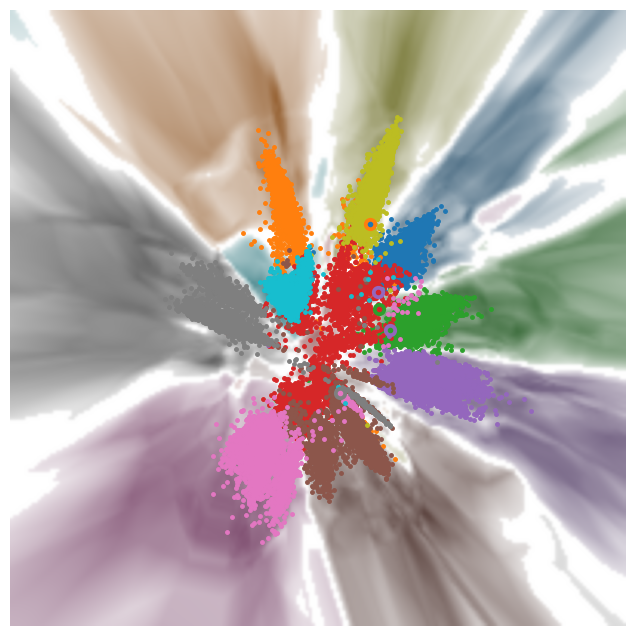

In [9]:
##### visuallize all data
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
encoded_Y = autoencoder.encoder(Y)
I = np.eye(512)
from AlignVis_Visualizer.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join(TAR_PATH, "vis.png"))

In [10]:
eval.eval_boundary_nn_ref_in_ref(ref_features)

#train# boundary preserving: 1.40/15 in epoch 200


1.3953

In [ ]:
eval.eval_boundary_nn_ref_in_ref(ref_features)

In [23]:
eval.eval_boundary_nn_autoencoder(tar_features, autoencoder)

#train# boundary preserving: 1.54/15 in epoch 200


1.53532

In [11]:
def eval_boundary_align_sensitivity(autoencoder, tar_b_features, ref_b_features):
        ############## init ###################
        #init target
        print("123")
        tar_b_pred = tar_provider.get_pred(TAR_EPOCH, tar_b_features)
        tar_b_pred = tar_b_pred + 1e-8
        tar_sort_preds = np.sort(tar_b_pred, axis=1)
        tar_diff = (tar_sort_preds[:, -1] - tar_sort_preds[:, -2]) / (tar_sort_preds[:, -1] - tar_sort_preds[:, 0])
        tar_border = np.zeros(len(tar_diff), dtype=np.uint8) + 0.05
        tar_border[tar_diff < 0.15] = 1

        #init reference
        ref_b_pred = ref_provider.get_pred(REF_EPOCH, ref_b_features)
        ref_b_pred = ref_b_pred + 1e-8
        ref_sort_preds = np.sort(ref_b_pred, axis=1)
        ref_diff = (ref_sort_preds[:, -1] - ref_sort_preds[:, -2]) / (ref_sort_preds[:, -1] - ref_sort_preds[:, 0])
        ref_border = np.zeros(len(ref_diff), dtype=np.uint8) + 0.05
        ref_border[ref_diff < 0.15] = 1
        
        ##### get all boundary list
        all_boundary_list = []
        
        for i in range(len(ref_border)):
            if ref_border[i] == 1 and tar_border[i] == 1:
                all_boundary_list.append(i)
        print(len(all_boundary_list))
        #### get ref low dimensional border
        ref_b_embedding = projector.batch_project(REF_EPOCH, ref_b_features)
        ref_b_inv = projector.batch_inverse(REF_EPOCH,ref_b_embedding)
        ref_b_pred_l = ref_provider.get_pred(REF_EPOCH, ref_b_inv)
        ref_b_pred_l = ref_b_pred_l  + 1e-8
        ref_sort_preds_l  = np.sort(ref_b_pred_l , axis=1)
        ref_diff_l  = (ref_sort_preds_l[:, -1] - ref_sort_preds_l[:, -2]) / (ref_sort_preds_l[:, -1] - ref_sort_preds_l[:, 0])
        ref_border_l = np.zeros(len(ref_diff_l), dtype=np.uint8) + 0.05
        ref_border_l[ref_diff_l < 0.15] = 1
        
        #### get target low dimensional border
        tar_b_embedding = projector.batch_project(REF_EPOCH, autoencoder.encoder(torch.Tensor(ref_b_features)).detach().numpy())
        tar_b_inv = projector.batch_inverse(REF_EPOCH,tar_b_embedding)
        tar_b_inv = autoencoder.decoder(torch.Tensor(tar_b_inv)).detach().numpy()
        tar_b_pred_l = tar_provider.get_pred(REF_EPOCH, tar_b_inv)
        tar_b_pred_l = tar_b_pred_l  + 1e-8
        tar_sort_preds_l  = np.sort(tar_b_pred_l , axis=1)
        tar_diff_l  = (tar_sort_preds_l[:, -1] - tar_sort_preds_l[:, -2]) / (tar_sort_preds_l[:, -1] - tar_sort_preds_l[:, 0])
        tar_border_l = np.zeros(len(tar_diff_l), dtype=np.uint8) + 0.05
        tar_border_l[tar_diff_l < 0.15] = 1

        all_boundary_list_l = []
       
        all_change = []
        all_change_l=[]
      
        for i in range(len(ref_border)):
          ##### low dimension all border
            if ref_border_l[i] == 1 and tar_border_l[i] == 1:
                all_boundary_list_l.append(i)
            if ref_border[i] != tar_border[i]:
                 all_change.append(i)
            if ref_border[i] != tar_border[i] and tar_border_l[i] == tar_border[i]:
                 all_change_l.append(i)
                 
                 
           


        print("boundary sample preserving{}/{}".format(len(all_boundary_list_l),len(all_boundary_list)))
        print("boundary change preserving{}/{}".format(len(all_change_l),len(all_change)))
       
eval_boundary_align_sensitivity(autoencoder,np.concatenate((tar_train_data,tar_features),axis=0), np.concatenate((ref_train_data,ref_features),axis=0))       

123


100%|██████████| 260/260 [00:00<00:00, 7815.32it/s]

2026



100%|██████████| 260/260 [00:00<00:00, 7848.40it/s]

boundary sample preserving522/2026
boundary change preserving278/483
